# Assignment 2 Statistical Treatment for Retail Datasets

**Nama : Nafiatul Risa**

**Kode : PYTN-KS09-022**

# Project Overview

**NYC Property Sales Dataset** is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

This task requires to formulate questions and derive statistical hypothesis tests to answer these questions. And must be able to make decisions using scientific data. 

# Project Rubric

**Code Review** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Measure of Central Tendency: Mean | Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Measure of Central Tendency: Median | Student Mengimplementasikan Median dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Measure of Central Tendency: Modus | Student Mengimplementasikan Modus dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Measure of Spread: Range | Student Mengimplementasikan Range dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Measure of Spread: Variance | Student Mengimplementasikan Variance dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Measure of Spread: Standard Deviation | Student Mengimplementasikan SD dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy |
| Probability Distribution | Student Menganalisa Distribusi Data Dan Menarik Informasi Dari Distribusi Tersebut |
| Confidence Intervals | Mengimplementasikan Confidence Intervals |
| Hypothesis Testing | Membuat 1 Hipotesis Dan Menarik Kesimpulan Dari Data Yang Ada |
| Preprocessing | Student Melakukan Preproses Dataset Sebelum Melakukan Proses Statistik. |
| Apakah Kode Berjalan Tanpa Ada Error? | Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat Dengan Benar. |

**Readability** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Tertata Dengan Baik | Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode. |

**Analysis** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Overall Analysis | Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis. |

# A. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

# B. Data Preprocessing

In [2]:
df= pd.read_csv('./dataset/nyc-rolling-sales.csv')

df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
#Dimension of dataframe
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
84548 baris
22 kolom


In [5]:
df.index

RangeIndex(start=0, stop=84548, step=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
df.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [8]:
# Melihat nilai unique
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
--------------------------------------------------------------------------------
Nilai Unique Kolom BOROUGH
[1 2 3 4 5]
--------------------------------------------------------------------------------
Nilai Unique Kolom NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHE

In [9]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum() #Check if any column has null values

Jumlah Missing Value tiap column: 


Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [10]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) #Check duplicate data

Jumlah Duplicate Data  0


**Analisis:**
    
Berdasarkan hasil diatas, ditemukan beberapa kolom yang masing terdapat unstandart missing value, yaitu:
1. Kolom "Unnamed: 0" dan kolom 'EASE-MENT' tidak memuat informasi untuk analisis, sehingga kolom tersebut akan dibuang.
2. Kolom 'TAX CLASS AT PRESENT' terdapat nilai (' ') yang merupakan missing values.
3. Kolom 'BUILDING CLASS AT PRESENT' dan kolom 'APARTMENT NUMBER', terdapat nilai (' ') yang merupakan missing values.
4. Kolom 'ZIP CODE', 'TOTAL UNITS', dan 'YEAR BUILT', terdapat nilai (0) yang merupakan missing values.
5. Kolom 'SALE PRICE' terdapat nilai (' - ') yang merupakan missing values. Nilai ini nantinya diganti dengan 0 dan dianggap tidak terdapat transaksi.

Karena terdapat unstandart missing value, maka akan dilakukan data cleaning.

# C. Data Cleaning

In [11]:
# Mendeteksi format dari non standard missing values
missing = ['NA', 'NaN', 'na', 'n/a', 'N/A', 'n-a', ' ', ' -  ',  "--", "?"]

df = pd.read_csv('./dataset/nyc-rolling-sales.csv', na_values=missing)

In [12]:
# Nilai '0' pada ZIP CODE, TOTAL UNIT, dan YEAR BUILT dirubah dengan np.nan
df['ZIP CODE'] = df['ZIP CODE'].replace({0: np.nan})
df['TOTAL UNITS'] = df['TOTAL UNITS'].replace({0: np.nan})
df['YEAR BUILT'] = df['YEAR BUILT'].replace({0: np.nan})

In [13]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum()  # Check if any column has null values

Jumlah Missing Value tiap column: 


Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [14]:
# Menghapus kolom-kolom yang tidak dibutuhkan
df.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)

df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


In [15]:
# Mengganti missing values di kolom kategorik dengan nilai modus 
categoric_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cate_col in categoric_columns:
    df[cate_col].fillna(df[cate_col].mode()[0],inplace=True)

In [16]:
# Mengganti missing values di kolom numerik LAND SQUARE FEET dan GROSS SQUARE FEET dengan nilai median
num_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for num_col in num_columns:
    df[num_col].fillna(df[num_col].median(),inplace=True)

In [17]:
# Delete column yang masih terdapat missing value
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ADDRESS                         52363 non-null  object 
 8   ZIP CODE                        52363 non-null  float64
 9   RESIDENTIAL UNITS               52363 non-null  int64  
 10  COMMERCIAL UNITS                52363 non-null  int64  
 11  TOTAL UNITS                     52363 non-null  float64
 12  LAND SQUARE FEET                

In [19]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) #Check duplicate data

Jumlah Duplicate Data  339


In [20]:
# Delete Duplicate column
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)

In [21]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


In [22]:
# Mengubah tipe data
categoric_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# Mengubah kolom menjadi tipe 'str'
for col in categoric_columns:
    df[col] = df[col].astype('str')

# Mengubah kolom menjadi tipe 'float'
for col in float_columns:
    df[col] = df[col].astype('float64')

# Mengubah kolom menjadi tipe 'int'
for col in integer_columns:
    df[col] = df[col].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52024 non-null  object 
 1   NEIGHBORHOOD                    52024 non-null  object 
 2   BUILDING CLASS CATEGORY         52024 non-null  object 
 3   TAX CLASS AT PRESENT            52024 non-null  object 
 4   BLOCK                           52024 non-null  int64  
 5   LOT                             52024 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52024 non-null  object 
 7   ADDRESS                         52024 non-null  object 
 8   ZIP CODE                        52024 non-null  object 
 9   RESIDENTIAL UNITS               52024 non-null  int64  
 10  COMMERCIAL UNITS                52024 non-null  int64  
 11  TOTAL UNITS                     52024 non-null  float64
 12  LAND SQUARE FEET                

In [24]:
# Mengubah nilai 'BOROUGH' Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [25]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE DATE dt'] = df['SALE DATE'].dt.day
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009.0,8,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009.0,24,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2,...,4000.0,1496.0,1925.0,1,B2,460000.0,2017,July,5,Wednesday
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,0,...,208033.0,64117.0,2001.0,4,K6,11693337.0,2016,December,21,Wednesday


In [26]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum() #Check if any column has null values

Jumlah Missing Value tiap column: 


BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52024 non-null  object 
 1   NEIGHBORHOOD                    52024 non-null  object 
 2   BUILDING CLASS CATEGORY         52024 non-null  object 
 3   TAX CLASS AT PRESENT            52024 non-null  object 
 4   BLOCK                           52024 non-null  int64  
 5   LOT                             52024 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52024 non-null  object 
 7   ADDRESS                         52024 non-null  object 
 8   ZIP CODE                        52024 non-null  object 
 9   RESIDENTIAL UNITS               52024 non-null  int64  
 10  COMMERCIAL UNITS                52024 non-null  int64  
 11  TOTAL UNITS                     52024 non-null  float64
 12  LAND SQUARE FEET                

**Analisis:**

Beberapa hal yang saya lakukan saat data cleaning:
1. Mendeteksi missing value pada data
2. Merubah nilai '0' pada column ZIP CODE, TOTAL UNIT, dan YEAR BUILT dengan np.nan
3. Menghitung jumlah missing value tiap column
4. Menghapus kolom 'Unnamed: 0', 'EASE-MENT', dan 'APARTMENT NUMBER'.
5. Mengganti missing values pada kolom 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', dan 'YEAR BUILT' dengan nilai modus masing-masing kolom
6. Mengganti missing values pada kolom LAND SQUARE FEET dan GROSS SQUARE FEET dengan nilai median masing-masing kolom
7. Menghapus kolom yang ada missing value
8. Menghapus duplicate data
9. Merubah tipe data kolom kategorik menjadi str, kolom float menjadi float64, dan kolom integer menjadi int64
10. Merubah nilai kolom 'BOROUGH' 1 = Manhattan , 2 = Bronx , 3 = Brooklyn, 4 = Queens, dan 5 = Staten Island.
11. Merubah kolom 'SALE DATE' menjadi tipe datetime
12. Menambahkan kolom year, month, dan date.
13. Menghapus kolom 'SALE DATE'


# D. Measure of Central Tendency

## 1. Mean

**Question:** Wilayah mana dengan average sale price tertinggi?

**Pre-processing if needed**

**Implement statistical method**

In [28]:
# Mean sale price manhattan
avg1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].mean()

# Mean sale price Bronx
avg2 = df[df['BOROUGH']=='Bronx']['SALE PRICE'].mean()

# Mean sale price Brooklyn
avg3 = df[df['BOROUGH']=='Brooklyn']['SALE PRICE'].mean()

# Mean sale price Queens
avg4 = df[df['BOROUGH']=='Queens']['SALE PRICE'].mean()

# Mean sale price Staten Island
avg5 = df[df['BOROUGH']=='Staten Island']['SALE PRICE'].mean()

print('Mean SALE PRICE di wilayah Manhattan:', avg1)
print('Mean SALE PRICE di wilayah Bronx:', avg2)
print('Mean SALE PRICE di wilayah Brooklyn:', avg3)
print('Mean SALE PRICE di wilayah Queens:', avg4)
print('Mean SALE PRICE di wilayah Staten Island:', avg5)

Mean SALE PRICE di wilayah Manhattan: 5271222.55703289
Mean SALE PRICE di wilayah Bronx: 680124.0516930836
Mean SALE PRICE di wilayah Brooklyn: 868244.6211978366
Mean SALE PRICE di wilayah Queens: 871240.4490599688
Mean SALE PRICE di wilayah Staten Island: 508187.1826132587


**Conclusion**

Wilayah dengan average sale price tertinggi dimiliki oleh wilayah Manhattan dengan jumlah 5271222.55703289. Wilayah kedua dengan average sale price tertinggi berada di wilayah Queens sejumlah 871240.4490599688.

## 2. Median

**Question:** Wilayah mana yang median LAND SQUARE FEET terendah?

**Pre-processing if needed**

**Implement statistical method**

In [29]:
# Median LAND SQUARE FEET price manhattan
med1 = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].median()

# Median LAND SQUARE FEET Bronx
med2 = df[df['BOROUGH']=='Bronx']['LAND SQUARE FEET'].median()

# Median LAND SQUARE FEET Brooklyn
med3 = df[df['BOROUGH']=='Brooklyn']['LAND SQUARE FEET'].median()

# Median LAND SQUARE FEET Queens
med4 = df[df['BOROUGH']=='Queens']['LAND SQUARE FEET'].median()

# Median LAND SQUARE FEET Staten Island
med5 = df[df['BOROUGH']=='Staten Island']['LAND SQUARE FEET'].median()

print('Median LAND SQUARE FEET di wilayah Manhattan:', med1)
print('Median LAND SQUARE FEET di wilayah Bronx:', med2)
print('Median LAND SQUARE FEET di wilayah Brooklyn:', med3)
print('Median LAND SQUARE FEET di wilayah Queens:', med4)
print('Median LAND SQUARE FEET di wilayah Staten Island:', med5)

Median LAND SQUARE FEET di wilayah Manhattan: 2325.0
Median LAND SQUARE FEET di wilayah Bronx: 2500.0
Median LAND SQUARE FEET di wilayah Brooklyn: 2000.0
Median LAND SQUARE FEET di wilayah Queens: 2500.0
Median LAND SQUARE FEET di wilayah Staten Island: 3000.0


**Conclusion**

Median terendah dari LAND SQUARE FEET berada di wilayah Brooklyn dengan Median 2000.

## 3. Modus

**Question:** Tahun berapa properti sering dibangun di setiap wilayah?

**Pre-processing if needed**

**Implement statistical method**

In [30]:
# Modus Year Build di Manhattan
mod1 =df[df['BOROUGH']=='Manhattan']['YEAR BUILT'].mode()

# Modus Year Build di Bronx
mod2 =df[df['BOROUGH']=='Bronx']['YEAR BUILT'].mode()

# Modus Year Build di Brooklyn
mod3 =df[df['BOROUGH']=='Brooklyn']['YEAR BUILT'].mode()

# Modus Year Build di Queens
mod4 =df[df['BOROUGH']=='Queens']['YEAR BUILT'].mode()

# Modus Year Build di Staten Island
mod5 =df[df['BOROUGH']=='Staten Island']['YEAR BUILT'].mode()

print('Manhattan sering membangun properti pada tahun', mod1)
print('Bronx sering membangun properti pada tahun', mod2)
print('Brooklyn sering membangun properti pada tahun', mod3)
print('Queens sering membangun properti pada tahun', mod4)
print('Staten Island sering membangun properti pada tahun', mod5)

Manhattan sering membangun properti pada tahun 0    1920.0
dtype: object
Bronx sering membangun properti pada tahun 0    1920.0
dtype: object
Brooklyn sering membangun properti pada tahun 0    1920.0
dtype: object
Queens sering membangun properti pada tahun 0    1920.0
dtype: object
Staten Island sering membangun properti pada tahun 0    1970.0
dtype: object


**Conclusion**

Pembangunan properti di wilayah Manhattan, Bronx, Brooklyn, dan Queens sering terjadi pada tahun 1920. Sedangkan Staten Island sering membangun properti pada tahun 1970

# E. Measured of Spread

## 1. Range

**Question:** Wilayah mana dengan range GROSS SQUARE FEET tertinggi?

**Pre-processing if needed**

**Implement statistical method**

In [31]:
# Mencari range GROSS SQUARE FEET di wilayah Manhattan
max_gsf1 = df[df['BOROUGH']=='Manhattan']['GROSS SQUARE FEET'].max()
min_gsf1 = df[df['BOROUGH']=='Manhattan']['GROSS SQUARE FEET'].min()
range_gsf1 = max_gsf1 - min_gsf1

# Mencari range GROSS SQUARE FEET di wilayah Bronx
max_gsf2 = df[df['BOROUGH']=='Bronx']['GROSS SQUARE FEET'].max()
min_gsf2 = df[df['BOROUGH']=='Bronx']['GROSS SQUARE FEET'].min()
range_gsf2 = max_gsf2 - min_gsf2

# Mencari range GROSS SQUARE FEET di wilayah Brooklyn
max_gsf3 = df[df['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].max()
min_gsf3 = df[df['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].min()
range_gsf3 = max_gsf3 - min_gsf3

# Mencari range GROSS SQUARE FEET di wilayah Queens
max_gsf4 = df[df['BOROUGH']=='Queens']['GROSS SQUARE FEET'].max()
min_gsf4 = df[df['BOROUGH']=='Queens']['GROSS SQUARE FEET'].min()
range_gsf4 = max_gsf4 - min_gsf4

# Mencari range GROSS SQUARE FEET di wilayah Staten Island
max_gsf5 = df[df['BOROUGH']=='Staten Island']['GROSS SQUARE FEET'].max()
min_gsf5 = df[df['BOROUGH']=='Staten Island']['GROSS SQUARE FEET'].min()
range_gsf5 = max_gsf5 - min_gsf5

print('Range wilayah Manhattan', range_gsf1)
print('Range wilayah Bronx', range_gsf2)
print('Range wilayah Brooklyn', range_gsf3)
print('Range wilayah Queens', range_gsf4)
print('Range wilayah Staten Island', range_gsf5)

Range wilayah Manhattan 1616884.0
Range wilayah Bronx 1303935.0
Range wilayah Brooklyn 1330743.0
Range wilayah Queens 3750365.0
Range wilayah Staten Island 682960.0


**Conclusion**

Wilayah dengan range GROSS SQUARE FEET tertinggi berada di wilayah Queens dengan range 3.750.365.

## 2. Variance

**Question:** Wilayah dengan variance TOTAL UNITS terbanyak?

**Pre-processing if needed**

**Implement statistical method**

In [32]:
# Variance dari Total unit di wilayah Manhattan
var1 = df[df['BOROUGH']=='Manhattan']['TOTAL UNITS'].var()

# Variance dari Total unit di wilayah Bronx
var2 = df[df['BOROUGH']=='Bronx']['TOTAL UNITS'].var()

# Variance dari Total unit di wilayah Brooklyn
var3 = df[df['BOROUGH']=='Brooklyn']['TOTAL UNITS'].var()

# Variance dari Total unit di wilayah Queens
var4 = df[df['BOROUGH']=='Queens']['TOTAL UNITS'].var()

# Variance dari Total unit di wilayah Staten Island
var5 = df[df['BOROUGH']=='Staten Island']['TOTAL UNITS'].var()

print('Variance wilayah Manhattan', var1)
print('Variance wilayah Bronx', var2)
print('Variance wilayah Brooklyn', var3)
print('Variance wilayah Queens', var4)
print('Variance wilayah Staten Island', var5)

Variance wilayah Manhattan 696.1571987865132
Variance wilayah Bronx 644.0641459570377
Variance wilayah Brooklyn 88.65901925595473
Variance wilayah Queens 709.8474844944102
Variance wilayah Staten Island 12.84490286113471


**Conclusion**

Variance terbanyak berada diwilayah Queens dengan jumlah 709.8474844944102

## 3. Standard Deviation

**Question:** Wilayah mana yang titik data 'SALE PRICE'nya tersebar di nilai yang luas?

**Pre-processing if needed**

**Implement statistical method**

In [33]:
# Standard deviation dari SALE PRICE di wilayah Manhattan
std1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].std()

# Standard deviation dari SALE PRICE di wilayah Bronx
std2 = df[df['BOROUGH']=='Bronx']['SALE PRICE'].std()

# Standard deviation dari SALE PRICE di wilayah Brooklyn
std3 = df[df['BOROUGH']=='Brooklyn']['SALE PRICE'].std()

# Standard deviation dari SALE PRICE di wilayah Queens
std4 = df[df['BOROUGH']=='Queens']['SALE PRICE'].std()

# Standard deviation dari SALE PRICE di wilayah Staten Island
std5 = df[df['BOROUGH']=='Staten Island']['SALE PRICE'].std()

print('Standart Deviasi wilayah Manhattan', std1)
print('Standart Deviasi wilayah Bronx', std2)
print('Standart Deviasi wilayah Brooklyn', std3)
print('Standart Deviasi wilayah Queens', std4)
print('Standart Deviasi wilayah Staten Island', std5)

Standart Deviasi wilayah Manhattan 33893994.33251796
Standart Deviasi wilayah Bronx 3081402.9016361455
Standart Deviasi wilayah Brooklyn 3295881.0822410597
Standart Deviasi wilayah Queens 3381225.410966872
Standart Deviasi wilayah Staten Island 459719.5420991591


**Conclusion**

Titik data dapat tersebar dengan luas apabila standart deviasinya tinggi. Wilayah yang titik data 'SALE PRICE'nya tersebar dengan luas berada di wilayah Manhattan dengan nilai standart deviasi 33893994.33251796.

# F. Probability Distribution

**Question:** Bagaimana probability distribution 'SALE PRICE' di setiap wilayah?

**Pre-processing if needed**

<Figure size 864x360 with 0 Axes>

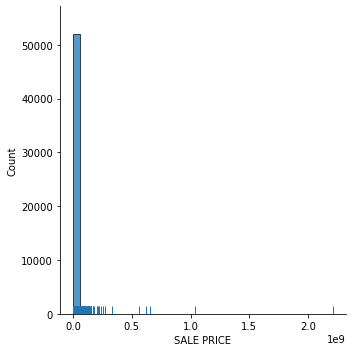

In [34]:
# Melihat distribusi data
plt.figure(figsize=(12, 5))
sns.displot(df['SALE PRICE'], bins=40, rug=True)
plt.show()

<Figure size 864x360 with 0 Axes>

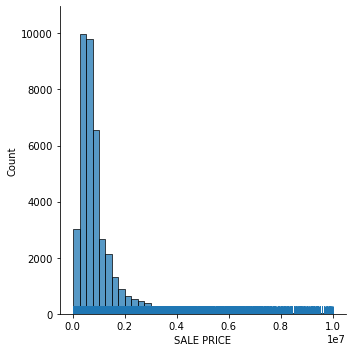

In [35]:
# Menghilangkan outliers
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

plt.figure(figsize=(12, 5))
sns.displot(df['SALE PRICE'], bins=40, rug=True)
plt.show()

C:\Users\RISA\AppData\Local\Temp/ipykernel_7804/157024841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOG_SALE_PRICE'] = np.log(df['SALE PRICE'])


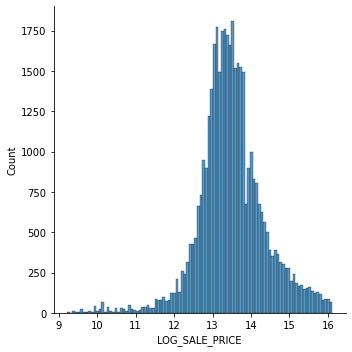

In [36]:
# Mengubah nilai'SALE PRICE' ke nilai lognya
df['LOG_SALE_PRICE'] = np.log(df['SALE PRICE'])
sns.displot(df['LOG_SALE_PRICE'], bins=100)

**Implement statistical method**

-0.12418728073339023


C:\Users\RISA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOG_SALE_PRICE', ylabel='Density'>

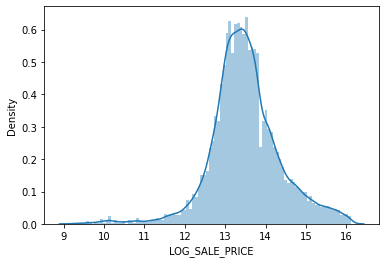

In [37]:
# Distribusi dari nilai log 'SALE PRICE'
print(df['LOG_SALE_PRICE'].skew())
sns.distplot(df['LOG_SALE_PRICE'], bins=100)

**Conclusion**

Distribusi dari nilai log SALE PRICE adalah distribui normal. Distribusi normal memiliki kurva kerapatan berbentuk lonceng yang dijelaskan dengan mean μ dan deviasi standarnya σ. Kurva kepadatan simetris, berpusat di sekitar meannya, dengan penyebarannya ditentukan oleh deviasi standarnya yang menunjukkan bahwa data di dekat mean lebih sering terjadi daripada data yang jauh dari mean.

# G. Confidence Intervals

**Question:** Berapa Confidence Intervals SALE PRICE dari wilayah Manhattan?

**Pre-processing if needed**

In [38]:
# Membuat dataframe baru
ci = df[df['BOROUGH']=='Manhattan']['SALE PRICE']

**Implement statistical method**

In [39]:
# Mencari mean, std, dan jumlah item dari dataframe baru
meanci = ci.mean()
stdci = ci.std()
nci = len(df[df['BOROUGH']=='Manhattan'])

# Membuat variabel z untuk z score
z = 1.96 # z score untuk Confidence Level 95%

# Mencari standard error
seci = stdci / np.sqrt(nci)

# Menghitung batas atas dan batas bawah
lower_bound = meanci - z * seci
upper_bound = meanci + z * seci

print('Confidence Interval SALE PRICE dari wilayah Manhattan: [',lower_bound,',',upper_bound,']')

Confidence Interval SALE PRICE dari wilayah Manhattan: [ 2366050.8480624193 , 2467996.0488447975 ]


**Conclusion**

Nilai Confidence Interval SALE PRICE dari wilayah Manhattan: [ 2366050.8480624193 , 2467996.0488447975 ]

# H. Hypothesis Testing

**Question:** Apakah total unit rata-rata per penjualan pada Wilayah Manhattan lebih besar secara signifikan daripada Bronx

H0 : Tidak ada perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx

H1 : Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx

**Pre-processing if needed**

In [40]:
df_tot = df[['BOROUGH','TOTAL UNITS']]
df_tot

,BOROUGH,TOTAL UNITS
0,Manhattan,5.0
3,Manhattan,10.0
4,Manhattan,6.0
6,Manhattan,8.0
76,Manhattan,1.0
...,...,...
84541,Staten Island,2.0
84543,Staten Island,2.0
84544,Staten Island,2.0
84545,Staten Island,2.0


In [41]:
# Membuat dataframe baru berdasarkan Manhattan BOROUGH
df_man = df_tot[df_tot['BOROUGH']=='Manhattan'].drop('BOROUGH', axis=1)

# Membuat dataframe baru berdasarkan Bronx BOROUGH
df_bro = df_tot[df_tot['BOROUGH']=='Bronx'].drop('BOROUGH', axis=1)

**Implement statistical method**

In [42]:
# Mencari jumlah item, mean dan standard deviation dari wilayah Brooklyn
n_man = len(df_man)
mean_man = df_man['TOTAL UNITS'].mean()
std_man = df_man['TOTAL UNITS'].std()

# Mencari jumlah item, mean dan standard deviation dari wilayah Queens
n_bro = len(df_bro)
mean_bro = df_bro['TOTAL UNITS'].mean()
std_bro = df_bro['TOTAL UNITS'].std()

print('Wilayah Manhattan:', n_man,",",mean_man,",",std_man)
print('Wilayah Bronx:', n_bro,",",mean_bro,",",std_bro)

Wilayah Manhattan: 6402 , 2.3837863167760074 , 19.328348884916434
Wilayah Bronx: 3779 , 2.9669224662609155 , 9.592061320043014


In [43]:
# Mencari p-value
z_score, pvalue = sm.stats.ztest(df_man['TOTAL UNITS'].dropna(),
                                 df_bro['TOTAL UNITS'].dropna(), alternative='two-sided')

# Penarikan kesimpulan
if pvalue > 0.05:
    print('Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx')
else:
    print('Tidak ada perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx')

Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx


**Conclusion**

p-value lebih rendah dari signifikan level yang ditentukan yaitu 0.05. Jadi hasilnya Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx.

# I. Overall Analysis

Hasil Statistical Treatment yang saya lakukan diatas adalah :
1. Wilayah dengan average sale price tertinggi dimiliki oleh wilayah Manhattan dengan jumlah 5271222.55703289. Wilayah kedua dengan average sale price tertinggi berada di wilayah Queens sejumlah 871240.4490599688.
2. Median terendah dari LAND SQUARE FEET berada di wilayah Brooklyn dengan Median 2000.
3. Pembangunan properti di wilayah Manhattan, Bronx, Brooklyn, dan Queens sering terjadi pada tahun 1920. Sedangkan Staten Island sering membangun properti pada tahun 1970
4. Wilayah dengan range GROSS SQUARE FEET tertinggi berada di wilayah Queens dengan range 3.750.365.
5. Variance terbanyak berada diwilayah Queens dengan jumlah 709.8474844944102
6. Titik data dapat tersebar dengan luas apabila standart deviasinya tinggi. Wilayah yang titik data 'SALE PRICE'nya tersebar dengan luas berada di wilayah Manhattan dengan nilai standart deviasi 33893994.33251796.
7. Distribusi dari nilai log SALE PRICE adalah distribui normal. Distribusi normal memiliki kurva kerapatan berbentuk lonceng yang dijelaskan dengan mean μ dan deviasi standarnya σ. Kurva kepadatan simetris, berpusat di sekitar meannya, dengan penyebarannya ditentukan oleh deviasi standarnya yang menunjukkan bahwa data di dekat mean lebih sering terjadi daripada data yang jauh dari mean.
8. Nilai Confidence Interval SALE PRICE dari wilayah Manhattan: [ 2366050.8480624193 , 2467996.0488447975 ]
9. Berdasarkan hasil uji hipotesis menggunakan z-test dengan alternative two-sided, p-value lebih rendah dari signifikan level yang ditentukan yaitu 0.05. Jadi hasilnya Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara Wilayah Manhattan dan Bronx.